In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['hatch.color'] = 'w'

In [2]:
df = pd.read_csv('./results/jmh_benchmark.csv').rename(columns = {'Param: keyTemplateString':'Cipher', 'Param: crdtSizeInElements':'CRDT Elements'})
df = df.fillna('N/A')
def shortenName(benchString):
    return benchString.replace('de.ckuessner.encrdt.benchmarks.AWLWWMapBenchmark.' , '')
df['Benchmark'] = df['Benchmark'].map(shortenName)
ciphers = df['Cipher'].unique().tolist()
df

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,CRDT Elements,Cipher
0,encryptOnly,avgt,1,15,0.002282,0.000036,ms/op,10,AES128_GCM
1,encryptOnly,avgt,1,15,0.002526,0.000038,ms/op,10,AES256_GCM
2,encryptOnly,avgt,1,15,0.003285,0.000107,ms/op,10,AES256_GCM_SIV
3,encryptOnly,avgt,1,15,0.028965,0.000871,ms/op,10,XCHACHA20_POLY1305
4,encryptOnly,avgt,1,15,0.015129,0.000268,ms/op,100,AES128_GCM
5,encryptOnly,avgt,1,15,0.017013,0.000264,ms/op,100,AES256_GCM
6,encryptOnly,avgt,1,15,0.019035,0.000318,ms/op,100,AES256_GCM_SIV
7,encryptOnly,avgt,1,15,0.273695,0.005808,ms/op,100,XCHACHA20_POLY1305
8,encryptOnly,avgt,1,15,0.131112,0.002622,ms/op,1000,AES128_GCM
9,encryptOnly,avgt,1,15,0.151015,0.002471,ms/op,1000,AES256_GCM


In [3]:
serializeOnlyVsEncryptOnly = df[df['Benchmark'].isin(['serializeOnly', 'encryptOnly'])].pivot(index='CRDT Elements', columns='Cipher', values='Score')
serializeOnlyVsEncryptOnly

Cipher,AES128_GCM,AES256_GCM,AES256_GCM_SIV,N/A,XCHACHA20_POLY1305
CRDT Elements,,,,,
10,0.002282,0.002526,0.003285,0.004169,0.028965
100,0.015129,0.017013,0.019035,0.037699,0.273695
1000,0.131112,0.151015,0.169222,0.583052,2.775782


In [4]:
encryptOnly = df[df['Benchmark'] == 'encryptOnly'][['Cipher', 'CRDT Elements', 'Score', 'Score Error (99.9%)']].rename(columns={'Score': 'Encryption Time', 'Score Error (99.9%)': 'Encryption Time Error (99.9%)'})
serializeOnly = df[df['Benchmark'] == 'serializeOnly'][['CRDT Elements', 'Score', 'Score Error (99.9%)']].rename(columns={'Score': 'Serialization Time', 'Score Error (99.9%)': 'Serialization Time Error (99.9%)'})
encryptAndSerialize = encryptOnly.merge(serializeOnly, left_on='CRDT Elements', right_on='CRDT Elements')
encryptAndSerialize

,Cipher,CRDT Elements,Encryption Time,Encryption Time Error (99.9%),Serialization Time,Serialization Time Error (99.9%)
0,AES128_GCM,10,0.002282,0.000036,0.004169,0.000230
1,AES256_GCM,10,0.002526,0.000038,0.004169,0.000230
2,AES256_GCM_SIV,10,0.003285,0.000107,0.004169,0.000230
3,XCHACHA20_POLY1305,10,0.028965,0.000871,0.004169,0.000230
4,AES128_GCM,100,0.015129,0.000268,0.037699,0.000548
5,AES256_GCM,100,0.017013,0.000264,0.037699,0.000548
6,AES256_GCM_SIV,100,0.019035,0.000318,0.037699,0.000548
7,XCHACHA20_POLY1305,100,0.273695,0.005808,0.037699,0.000548
8,AES128_GCM,1000,0.131112,0.002622,0.583052,0.014673
9,AES256_GCM,1000,0.151015,0.002471,0.583052,0.014673


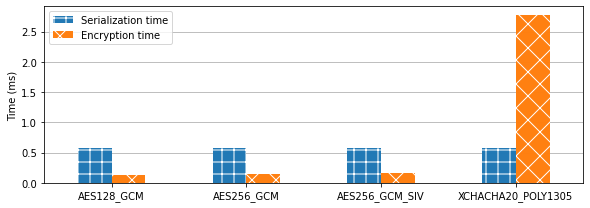

In [5]:
fig, ax = plt.subplots(figsize=(8.3, 3))
encryptAndSerializeFiltered = encryptAndSerialize[(encryptAndSerialize['CRDT Elements'] == 1_000) & (encryptAndSerialize['Encryption Time'] < 5) & (encryptAndSerialize['CRDT Elements'] <= 1000)].set_index('Cipher')
encryptAndSerializeFiltered[['Serialization Time','Encryption Time']].plot.bar(
    #stacked=True,
    ax=ax, alpha=.99
)

hatches = ('+'*4 + 'x'*4)
for bar, hatch in zip(ax.patches, hatches):
   bar.set_hatch(hatch)

ax.legend(labels=['Serialization time', 'Encryption time'])

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=0,
                   #ha='right'
                  )

ax.set_ylabel('Time (ms)')
ax.set_xlabel('')
ax.set_axisbelow(True)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [6]:
state_df = pd.read_csv('./results/state_size_benchmark.csv')
# Convert bytes to KiB
state_df['untrustedReplicaSize'] = state_df['untrustedReplicaSize'].div(1024)
state_df['mergedSize'] = state_df['mergedSize'].div(1024)
state_df

,concurrentUpdates,commonElements,uniqueElements,untrustedReplicaSize,mergedSize
0,1,9,10,1.249023,1.188477
1,2,8,10,2.503906,1.200195
2,3,7,10,3.755859,1.208984
3,4,6,10,5.007812,1.217773
4,1,99,100,11.729492,11.667969
5,2,98,100,23.464844,11.678711
6,3,97,100,35.197266,11.686523
7,4,96,100,46.929688,11.694336
8,1,999,1000,118.242188,118.179688
9,2,998,1000,236.490234,118.189453


In [7]:
delta_df = pd.read_csv('./results/delta_state_size_benchmark.csv')
# Convert bytes to KiB
delta_df['untrustedReplicaSize'] = delta_df['untrustedReplicaSize'].div(1024)
delta_df['mergedSize'] = delta_df['mergedSize'].div(1024)
delta_df['mergedEncryptedSize'] = delta_df['mergedEncryptedSize'].div(1024)
delta_df

,concurrentUpdates,commonElements,uniqueElements,untrustedReplicaSize,mergedSize,mergedEncryptedSize
0,1,9,10,1.977539,1.188477,1.241211
1,2,8,10,2.765625,1.197266,1.259766
2,3,7,10,3.553711,1.207031,1.279297
3,4,6,10,4.341797,1.216797,1.298828
4,1,99,100,20.362305,11.667969,11.721680
5,2,98,100,21.178711,11.675781,11.739258
6,3,97,100,21.992188,11.684570,11.757812
7,4,96,100,22.802734,11.693359,11.776367
8,1,999,1000,209.483398,118.176758,118.231445
9,2,998,1000,210.284180,118.183594,118.248047


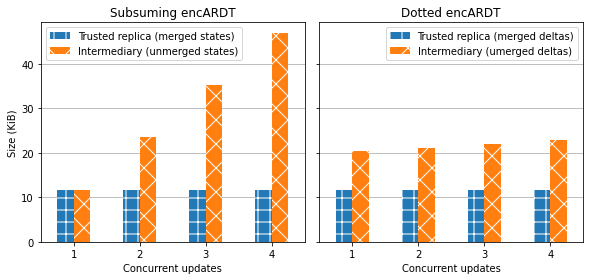

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(8.3,4), sharey=True)
uniqueElements = 100
xticks = [1,2,3,4]

state_concurrent_updates_df = state_df.query(f'uniqueElements == {uniqueElements}').set_index('concurrentUpdates')
state_concurrent_updates_df.plot.bar(y=['mergedSize','untrustedReplicaSize'], ax=ax1, alpha=.99)

delta_concurrent_updates_df = delta_df.query(f'uniqueElements == {uniqueElements}').set_index('concurrentUpdates')
delta_concurrent_updates_df.plot.bar(y=['mergedSize', 'untrustedReplicaSize'], ax=ax2, alpha=.99)

hatches = ('+'*4 + 'x'*4)
for ax in [ax1,ax2]:
    for bar, hatch in zip(ax.patches, hatches):
       bar.set_hatch(hatch)

ax1.set_title('Subsuming encARDT')
ax1.set_ylabel('Size (KiB)')
ax1.set_xlabel('Concurrent updates')
ax1.set_xticklabels(xticks, rotation=0)
ax1.legend(labels=['Trusted replica (merged states)', 'Intermediary (unmerged states)'])

ax2.set_title('Dotted encARDT')
ax2.set_ylabel('Size (KiB)')
ax2.set_xlabel('Concurrent updates')
ax2.set_xticklabels(xticks, rotation=0)
ax2.legend(labels=['Trusted replica (merged deltas)', 'Intermediary (umerged deltas)'])

plt.tight_layout()
ax1.grid(axis='y')
ax2.grid(axis='y')
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)

In [9]:
delta_df_linear = pd.read_csv('./results/delta_state_size_benchmark_linear_sampling.csv')
# Convert bytes to KiB
delta_df_linear['untrustedReplicaSize'] = delta_df_linear['untrustedReplicaSize'].div(1024)
delta_df_linear['mergedSize'] = delta_df_linear['mergedSize'].div(1024)
delta_df_linear['mergedEncryptedSize'] = delta_df_linear['mergedEncryptedSize'].div(1024)
delta_df_linear

,concurrentUpdates,commonElements,uniqueElements,untrustedReplicaSize,mergedSize,mergedEncryptedSize
0,1,1000,1000,209.507812,118.166992,118.212891
1,1,2000,2000,424.120117,237.076172,237.122070
2,1,3000,3000,639.135742,356.270508,356.316406
3,1,4000,4000,853.665039,474.963867,475.009766
4,1,5000,5000,1068.180664,593.776367,593.822266
5,1,6000,6000,1282.856445,712.503906,712.549805
6,1,7000,7000,1497.458984,831.403320,831.449219
7,1,8000,8000,1712.010742,950.251953,950.297852
8,1,9000,9000,1927.006836,1069.147461,1069.193359
9,1,10000,10000,2141.364258,1187.796875,1187.843750


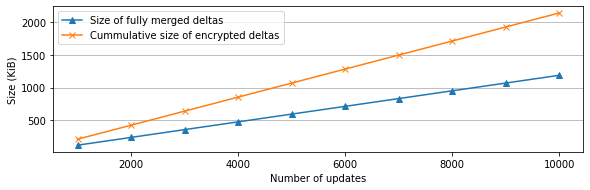

In [10]:
fig, ax = plt.subplots(figsize=(8.3,2.75))

query_df = delta_df_linear.query('concurrentUpdates == 1').set_index('uniqueElements')

query_df.plot.line(y='mergedSize', ax=ax, marker='^')
query_df.plot.line(y='untrustedReplicaSize', ax=ax, marker='x')
ax.set_ylabel('Size (KiB)')
ax.set_xlabel('Number of updates')
ax.legend(labels=['Size of fully merged deltas', 'Cummulative size of encrypted deltas'])
ax.grid(axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

In [11]:
delta_df_linear['mergedEncryptedSize']/delta_df_linear['mergedSize']

0    1.000388
1    1.000194
2    1.000129
3    1.000097
4    1.000077
5    1.000064
6    1.000055
7    1.000048
8    1.000043
9    1.000039
dtype: float64

In [12]:
delta_df_linear['untrustedReplicaSize']/delta_df_linear['mergedSize']

0    1.772981
1    1.788961
2    1.793962
3    1.797326
4    1.798961
5    1.800490
6    1.801122
7    1.801639
8    1.802377
9    1.802803
dtype: float64

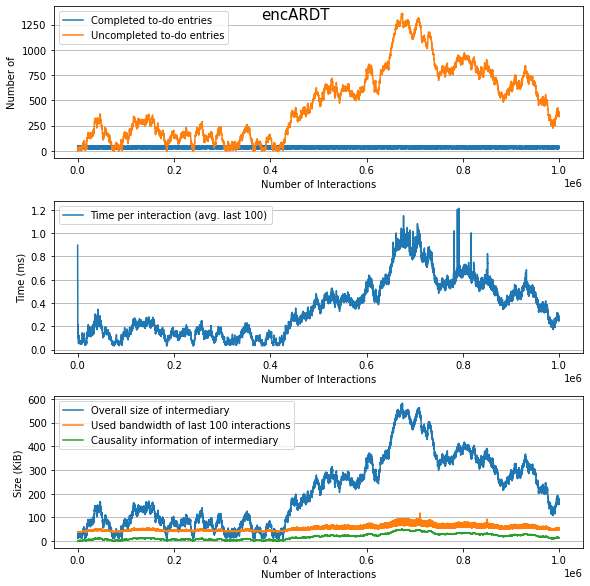

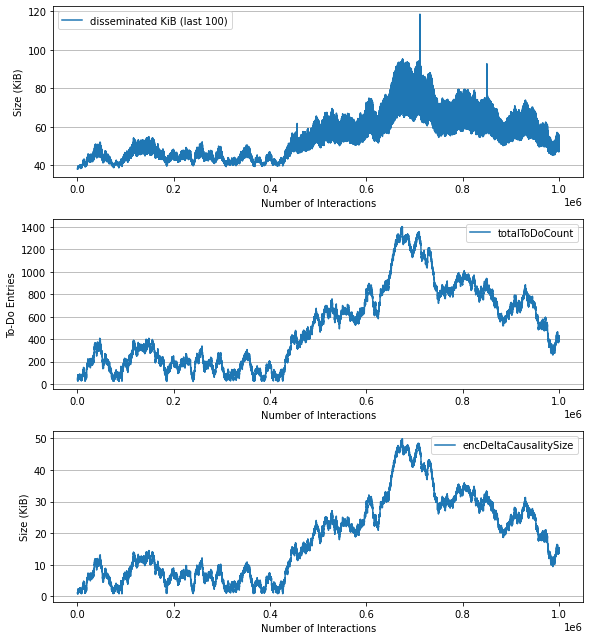

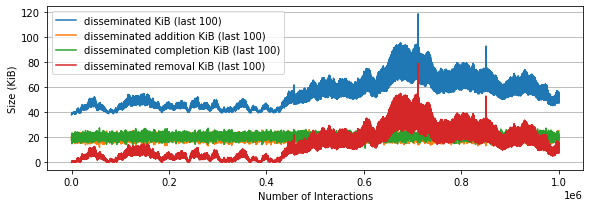

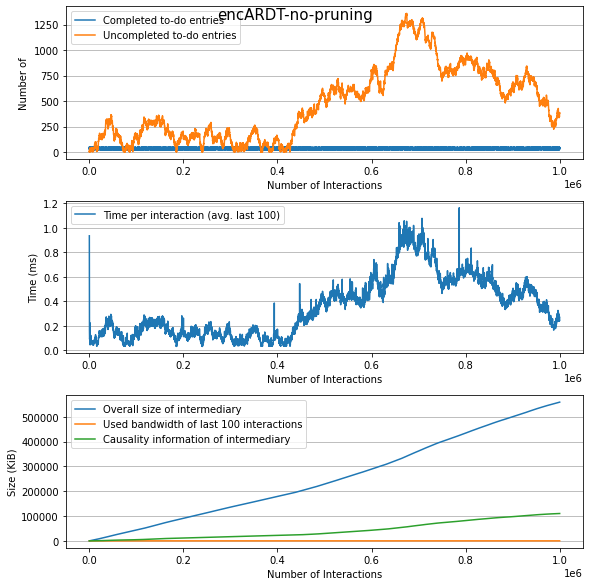

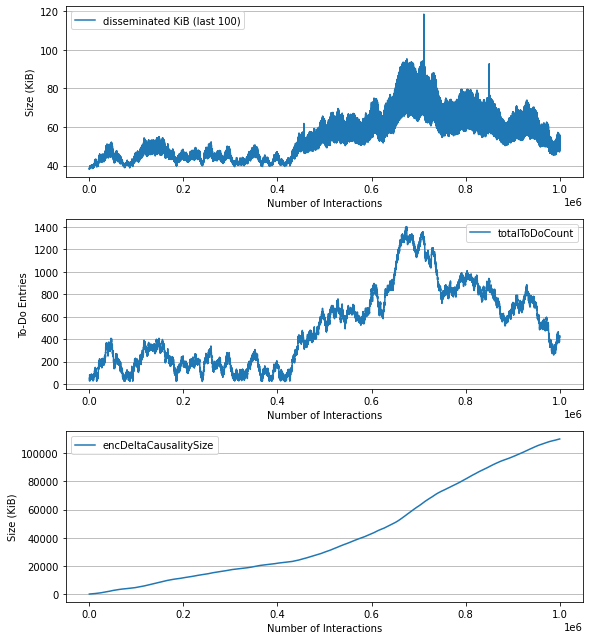

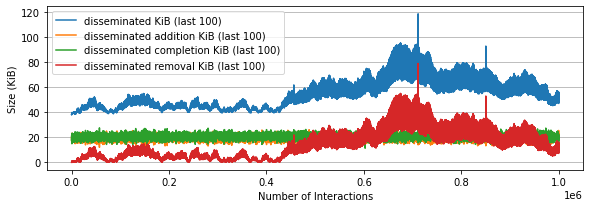

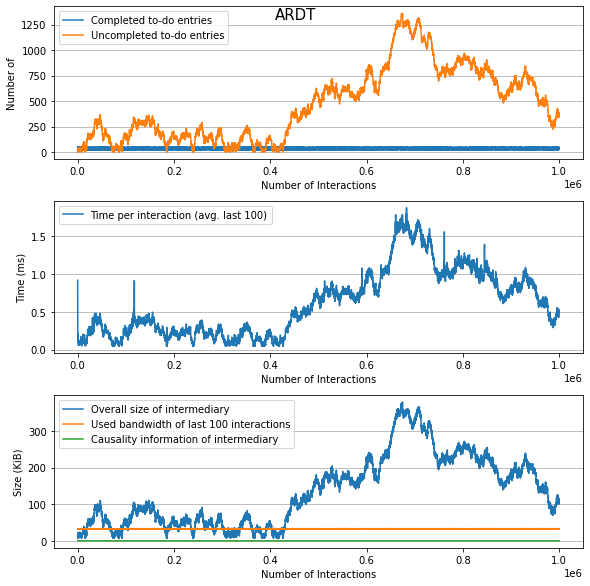

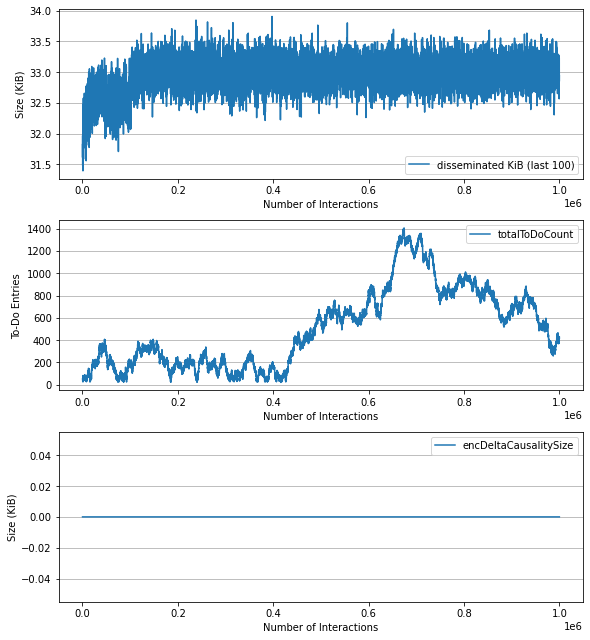

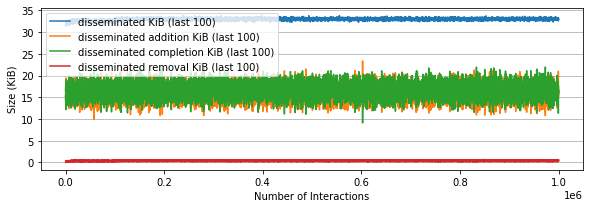

In [13]:
for todoapp_benchmark_type in ['encARDT', 'encARDT-no-pruning', 'ARDT']:
    if todoapp_benchmark_type == 'encARDT':
        inputfile = './results/todoapp_benchmark.csv'
    elif todoapp_benchmark_type == 'ARDT':
        inputfile = './results/todoapp_benchmark trusted intermediary.csv'
    elif todoapp_benchmark_type == 'encARDT-no-pruning':
        inputfile = './results/todoapp_benchmark_no_pruning.csv'
    else:
        raise Exception('')
        
    todoapp_df = pd.read_csv(inputfile).rename(
        columns = {'last100InteractionsNanoTime': 'Time per Interaction (avg last 100)',
                   'last100InteractionsDisseminatedBytes':'disseminated KiB (last 100)',
                   'last100InteractionsAdditionDisseminatedBytes':'disseminated addition KiB (last 100)',
                   'last100InteractionsCompletionDisseminatedBytes':'disseminated completion KiB (last 100)',
                   'last100InteractionsRemovalBytes':'disseminated removal KiB (last 100)'
                  })

    todoapp_df['intermediarySize'] /= 1024
    todoapp_df['encDeltaCausalitySize'] /= 1024
    todoapp_df['encDeltaCiphertextSize'] /= 1024
    todoapp_df['disseminated KiB (last 100)'] /= 1024
    todoapp_df['disseminated addition KiB (last 100)'] /= 1024
    todoapp_df['disseminated completion KiB (last 100)'] /= 1024
    todoapp_df['disseminated removal KiB (last 100)'] /= 1024

    todoapp_df['disseminated KiB (avg last 100)'] = todoapp_df['disseminated KiB (last 100)'] / 100
    todoapp_df['Time per Interaction (avg last 100)'] /= (1_000_000 * 100) # convert to ms and make average over 100
        
    todoapp_df['totalToDoCount'] = todoapp_df['completedToDos'] + todoapp_df['uncompletedToDos']

    fig, (ax3,ax2,ax1) = plt.subplots(3, 1, figsize=(8.3,3*2.75))
    todoapp_df.plot(ax=ax1, x='interactions',
                    y=['intermediarySize',
                       #'encDeltaCiphertextSize',
                       'disseminated KiB (last 100)',
                       'encDeltaCausalitySize',
                      ],
                    #color=['tab:orange','tab:cyan','tab:green','tab:blue']
                   )

    ax1.set_ylabel('Size (KiB)')
    ax1.set_xlabel('Number of Interactions')
    ax1.legend(labels=['Overall size of intermediary',
                       #'All encrypted deltas w/o causality information',
                       'Used bandwidth of last 100 interactions',
                       'Causality information of intermediary'
                      ])
    
    ax1.grid(axis='y')
    ax1.set_axisbelow(True)


    #ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
    todoapp_df.plot(ax=ax2, x='interactions', y='Time per Interaction (avg last 100)')

    ax2.set_ylabel('Time (ms)')
    ax2.set_xlabel('Number of Interactions')
    ax2.legend(labels=['Time per interaction (avg. last 100)'], loc=2)

    ax2.grid(axis='y')
    ax2.set_axisbelow(True)



    todoapp_df.plot(ax=ax3, x='interactions',
                    y=[#'intermediaryStoredDeltas',
                        'completedToDos',
                        'uncompletedToDos'],
                    #color=['tab:orange','tab:blue','tab:cyan','tab:green']
                   )
    ax3.grid(axis='y')
    ax3.set_axisbelow(True)
    ax3.set_xlabel('Number of Interactions')
    ax3.set_ylabel('Number of')
    ax3.legend(labels=[#'Stored deltas on intermediary',
                       'Completed to-do entries',
                       'Uncompleted to-do entries'])


    plt.tight_layout()
    plt.suptitle(todoapp_benchmark_type, fontsize=15)
    plt.show()

    
    fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(8.3,3*3))

    todoapp_df.plot(ax=ax1, y='disseminated KiB (last 100)', x='interactions')
    ax1.set_xlabel('Number of Interactions')
    ax1.set_ylabel('Size (KiB)')
    ax1.grid(axis='y')
    
    todoapp_df.plot(ax=ax2, y='totalToDoCount', x='interactions')
    ax2.set_xlabel('Number of Interactions')
    ax2.set_ylabel('To-Do Entries')
    ax2.grid(axis='y')
    
    todoapp_df.plot(ax=ax3, x='interactions', y='encDeltaCausalitySize')
    ax3.set_xlabel('Number of Interactions')
    ax3.set_ylabel('Size (KiB)')
    ax3.grid(axis='y')
    
    plt.tight_layout()
    plt.show()
    
    fig, ax = plt.subplots(1, 1, figsize=(8.3,3))

    todoapp_df.plot(ax=ax, x='interactions', y=['disseminated KiB (last 100)', 'disseminated addition KiB (last 100)', 'disseminated completion KiB (last 100)', 'disseminated removal KiB (last 100)'])
    ax.set_xlabel('Number of Interactions')
    ax.set_ylabel('Size (KiB)')
    ax.grid(axis='y')
    plt.tight_layout()
    plt.show()

todoapp_df = None